# Project Stage - III 
# (Distributions and Hypothesis Testing)

## Goals
* The goal of Stage III is to develop distributions and formal hypothesis tests for the intuitions you had in Stage I and II and utilize statistical modeling to prove/disprove them.

In [3]:
import pandas as pd
from datetime import datetime
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
from IPython.display import Image
import scipy.stats as stats
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import seaborn as sns


#import exception handling
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing super dataset
data = pd.read_csv('../../../../data/stage_3/superdataset.csv')
#data = pd.read_csv('superdataset.csv')
#data = pd.read_csv('superdataset.csv')

In [5]:
data['confirmed_daily'] = data['Confirmed'].diff()
data['deaths_daily'] = data['Deaths'].diff()

In [6]:
# drop the messed up values from 2020-01-22
data.drop(data[(data['Date'] == '2020-01-22')].index, inplace=True)
data.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily
1,0,statewide unallocated,AL,2020-01-23,0,0,0,0.0,0.0
2,0,statewide unallocated,AL,2020-01-24,0,0,0,0.0,0.0
3,0,statewide unallocated,AL,2020-01-25,0,0,0,0.0,0.0
4,0,statewide unallocated,AL,2020-01-26,0,0,0,0.0,0.0
5,0,statewide unallocated,AL,2020-01-27,0,0,0,0.0,0.0


In [7]:
data['Date'] = data.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))
data = data[data.countyFIPS != 0]

In [8]:
# Simplify the data to the state and relevant column
# County name will not be included because we're just looking at the state trends overall

nc = data[data['State'] == 'NC']
nc = nc[['State', 'Date', 'Confirmed', 'Deaths', 'population', 'confirmed_daily', 'deaths_daily']]
nc.head()

,State,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily
1426437,NC,2020-01-23,0,0,169509,0.0,0.0
1426438,NC,2020-01-24,0,0,169509,0.0,0.0
1426439,NC,2020-01-25,0,0,169509,0.0,0.0
1426440,NC,2020-01-26,0,0,169509,0.0,0.0
1426441,NC,2020-01-27,0,0,169509,0.0,0.0


In [9]:
nc['confirmed_daily_normalized'] = (nc['confirmed_daily']/nc['population'])*100000
nc['deaths_daily_normalized'] = (nc['deaths_daily']/nc['population'])*100000
#nc['Date'] =  pd.to_datetime(nc['Date'], format='%Y-%m-%d')
nc

,State,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized
1426437,NC,2020-01-23,0,0,169509,0.0,0.0,0.000000,0.000000
1426438,NC,2020-01-24,0,0,169509,0.0,0.0,0.000000,0.000000
1426439,NC,2020-01-25,0,0,169509,0.0,0.0,0.000000,0.000000
1426440,NC,2020-01-26,0,0,169509,0.0,0.0,0.000000,0.000000
1426441,NC,2020-01-27,0,0,169509,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
1501231,NC,2022-02-03,4425,46,18069,18.0,1.0,99.618130,5.534341
1501232,NC,2022-02-04,4439,48,18069,14.0,2.0,77.480768,11.068681
1501233,NC,2022-02-05,4439,48,18069,0.0,0.0,0.000000,0.000000
1501234,NC,2022-02-06,4439,48,18069,0.0,0.0,0.000000,0.000000


In [10]:
nc1 = nc.groupby("Date").sum().reset_index()

In [11]:
nc1

,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-23,0,0,10488084,0.0,0.0,0.000000,0.000000
1,2020-01-24,0,0,10488084,0.0,0.0,0.000000,0.000000
2,2020-01-25,0,0,10488084,0.0,0.0,0.000000,0.000000
3,2020-01-26,0,0,10488084,0.0,0.0,0.000000,0.000000
4,2020-01-27,0,0,10488084,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...
742,2022-02-03,2456386,21027,10488084,14980.0,123.0,14656.596771,113.076679
743,2022-02-04,2468806,21097,10488084,12420.0,70.0,11780.131964,104.769690
744,2022-02-05,2468806,21097,10488084,0.0,0.0,0.000000,0.000000
745,2022-02-06,2468806,21097,10488084,0.0,0.0,0.000000,0.000000


In [12]:
d_m = nc1['confirmed_daily_normalized'].mean()
d_m

3147.9706579249228

In [13]:
nc1['PMF'] = stats.poisson.pmf(k=nc1['confirmed_daily_normalized'].round(decimals=0), mu=d_m)
nc1

,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,PMF
0,2020-01-23,0,0,10488084,0.0,0.0,0.000000,0.000000,0.0
1,2020-01-24,0,0,10488084,0.0,0.0,0.000000,0.000000,0.0
2,2020-01-25,0,0,10488084,0.0,0.0,0.000000,0.000000,0.0
3,2020-01-26,0,0,10488084,0.0,0.0,0.000000,0.000000,0.0
4,2020-01-27,0,0,10488084,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
742,2022-02-03,2456386,21027,10488084,14980.0,123.0,14656.596771,113.076679,0.0
743,2022-02-04,2468806,21097,10488084,12420.0,70.0,11780.131964,104.769690,0.0
744,2022-02-05,2468806,21097,10488084,0.0,0.0,0.000000,0.000000,0.0
745,2022-02-06,2468806,21097,10488084,0.0,0.0,0.000000,0.000000,0.0


In [14]:
nc1['confirmed_daily_normalized']=nc1['confirmed_daily_normalized'].round(decimals=0)

In [15]:
nc1

,Date,Confirmed,Deaths,population,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized,PMF
0,2020-01-23,0,0,10488084,0.0,0.0,0.0,0.000000,0.0
1,2020-01-24,0,0,10488084,0.0,0.0,0.0,0.000000,0.0
2,2020-01-25,0,0,10488084,0.0,0.0,0.0,0.000000,0.0
3,2020-01-26,0,0,10488084,0.0,0.0,0.0,0.000000,0.0
4,2020-01-27,0,0,10488084,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
742,2022-02-03,2456386,21027,10488084,14980.0,123.0,14657.0,113.076679,0.0
743,2022-02-04,2468806,21097,10488084,12420.0,70.0,11780.0,104.769690,0.0
744,2022-02-05,2468806,21097,10488084,0.0,0.0,0.0,0.000000,0.0
745,2022-02-06,2468806,21097,10488084,0.0,0.0,0.0,0.000000,0.0


## Task1 
### Part1:
Graphically plot the distribution and describe the distribution statistics. If using discrete values, calculate the Probability Mass Function for the individual values or range (if using histogram) and plot that.

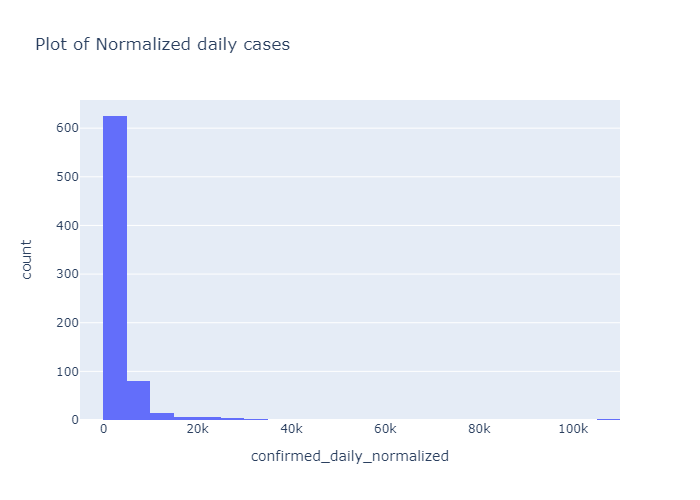

In [16]:
fig = px.histogram(nc1, x="confirmed_daily_normalized",nbins=50,title='Plot of Normalized daily cases')
fig.write_image("normalized_cases.png")
Image(filename="normalized_cases.png")
#fig.show()

* From this distribution it can be seen that the data is positively skewed.
* It has a discrete distribution.
* It gives information about number of covid cases occured in a day. 
* Poisson distribution provides the probability of seeing certain number of success in a given time interval. Let us try to plot poisson distribution on the data.

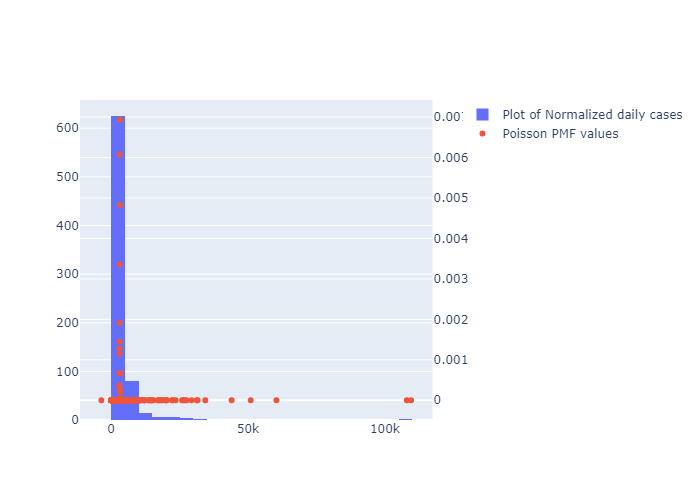

In [17]:
# Calculate the pmf values using the poission distribution and plot
fig = go.Figure()
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(go.Histogram(x=nc1["confirmed_daily_normalized"],nbinsx=40,name="Plot of Normalized daily cases"))
fig.add_trace(go.Scatter(x=nc1["confirmed_daily_normalized"], y=nc1["PMF"],mode='markers', name="Poisson PMF values"), secondary_y=True)
fig.write_image("Distribution.png")
Image(filename="Distribution.png")
#fig.show()

### From this plot, it can be seen that poisson model fits the distribution approximately, so it can be applied to he distribution to derive instincts from the data.

In [18]:
nc = nc.groupby([pd.Grouper(key='Date', freq='w')])[['confirmed_daily_normalized','deaths_daily_normalized']].agg({'confirmed_daily_normalized':'sum','deaths_daily_normalized' :'sum'}).reset_index()
#nc = nc.rename(columns={'normalized cases': 'cases per week', 'normalized deaths': 'deaths per week'})

In [19]:
nc

,Date,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-26,0.000000,0.000000
1,2020-02-02,0.000000,0.000000
2,2020-02-09,0.000000,0.000000
3,2020-02-16,0.000000,0.000000
4,2020-02-23,0.000000,0.000000
...,...,...,...
103,2022-01-16,161879.451476,268.087146
104,2022-01-23,149291.265699,202.878124
105,2022-01-30,187785.720435,553.800324
106,2022-02-06,90723.973032,570.655326


In [20]:
# ALabama
al = data[data['State'] == 'AL']
al = al[['State', 'Date', 'Confirmed', 'Deaths', 'population','confirmed_daily', 'deaths_daily']]
al['confirmed_daily_normalized'] = (al['confirmed_daily']/al['population'])*100000
al['deaths_daily_normalized'] = (al['deaths_daily']/al['population'])*100000
al['Date'] =  pd.to_datetime(al['Date'], format='%Y-%m-%d')
al = al.groupby([pd.Grouper(key='Date', freq='w')])[['confirmed_daily_normalized','deaths_daily_normalized']].agg({'confirmed_daily_normalized':'sum','deaths_daily_normalized' :'sum'}).reset_index()
al

,Date,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-26,0.000000,0.000000
1,2020-02-02,0.000000,0.000000
2,2020-02-09,0.000000,0.000000
3,2020-02-16,0.000000,0.000000
4,2020-02-23,0.000000,0.000000
...,...,...,...
103,2022-01-16,58069.459695,87.048827
104,2022-01-23,157607.827943,262.076920
105,2022-01-30,44985.027036,0.484015
106,2022-02-06,120608.520553,823.299054


In [21]:
# California
ca = data[data['State'] == 'CA']
ca = ca[['State', 'Date', 'Confirmed', 'Deaths', 'population','confirmed_daily', 'deaths_daily']]
ca['confirmed_daily_normalized'] = (ca['confirmed_daily']/ca['population'])*100000
ca['deaths_daily_normalized'] = (ca['deaths_daily']/ca['population'])*100000
ca['Date'] =  pd.to_datetime(ca['Date'], format='%Y-%m-%d')
ca = ca.groupby([pd.Grouper(key='Date', freq='w')])[['confirmed_daily_normalized','deaths_daily_normalized']].agg({'confirmed_daily_normalized':'sum','deaths_daily_normalized' :'sum'}).reset_index()
ca

,Date,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-26,9.751485,0.000000
1,2020-02-02,-135.517690,0.000000
2,2020-02-09,4.232717,0.051871
3,2020-02-16,3.102005,0.000000
4,2020-02-23,9.559049,0.051871
...,...,...,...
103,2022-01-16,72771.187221,80.945294
104,2022-01-23,72601.747649,81.515256
105,2022-01-30,50722.980811,127.159358
106,2022-02-06,17200.514270,93.032791


In [22]:
# Florida
fl = data[data['State'] == 'FL']
fl = fl[['State', 'Date', 'Confirmed', 'Deaths', 'population','confirmed_daily', 'deaths_daily']]
fl['confirmed_daily_normalized'] = (fl['confirmed_daily']/fl['population'])*100000
fl['deaths_daily_normalized'] = (fl['deaths_daily']/fl['population'])*100000
fl['Date'] =  pd.to_datetime(fl['Date'], format='%Y-%m-%d')
fl = fl.groupby([pd.Grouper(key='Date', freq='w')])[['confirmed_daily_normalized','deaths_daily_normalized']].agg({'confirmed_daily_normalized':'sum','deaths_daily_normalized' :'sum'}).reset_index()
fl

,Date,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-26,0.000000,0.0
1,2020-02-02,0.000000,0.0
2,2020-02-09,0.000000,0.0
3,2020-02-16,0.000000,0.0
4,2020-02-23,0.000000,0.0
...,...,...,...
103,2022-01-16,110075.000845,0.0
104,2022-01-23,96412.756599,0.0
105,2022-01-30,79730.557600,0.0
106,2022-02-06,50443.032521,0.0


In [23]:
# Illinois
il = data[data['State'] == 'IL']
il = il[['State', 'Date', 'Confirmed', 'Deaths', 'population','confirmed_daily', 'deaths_daily']]
il['confirmed_daily_normalized'] = (il['confirmed_daily']/il['population'])*100000
il['deaths_daily_normalized'] = (il['deaths_daily']/il['population'])*100000
il['Date'] =  pd.to_datetime(il['Date'], format='%Y-%m-%d')
il = il.groupby([pd.Grouper(key='Date', freq='w')])[['confirmed_daily_normalized','deaths_daily_normalized']].agg({'confirmed_daily_normalized':'sum','deaths_daily_normalized' :'sum'}).reset_index()
il

,Date,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-26,0.019417,0.000000
1,2020-02-02,0.019417,0.000000
2,2020-02-09,0.000000,0.000000
3,2020-02-16,0.000000,0.000000
4,2020-02-23,0.000000,0.000000
...,...,...,...
103,2022-01-16,205505.684334,691.018887
104,2022-01-23,206741.886235,636.665087
105,2022-01-30,133480.422274,715.847442
106,2022-02-06,64245.702982,489.771612


In [24]:
# Louisiana
la = data[data['State'] == 'LA']
la = la[['State', 'Date', 'Confirmed', 'Deaths', 'population','confirmed_daily', 'deaths_daily']]
la['confirmed_daily_normalized'] = (la['confirmed_daily']/la['population'])*100000
la['deaths_daily_normalized'] = (la['deaths_daily']/la['population'])*100000
la['Date'] =  pd.to_datetime(la['Date'], format='%Y-%m-%d')
la = la.groupby([pd.Grouper(key='Date', freq='w')])[['confirmed_daily_normalized','deaths_daily_normalized']].agg({'confirmed_daily_normalized':'sum','deaths_daily_normalized' :'sum'}).reset_index()
la

,Date,confirmed_daily_normalized,deaths_daily_normalized
0,2020-01-26,0.000000,0.000000
1,2020-02-02,0.000000,0.000000
2,2020-02-09,0.000000,0.000000
3,2020-02-16,0.000000,0.000000
4,2020-02-23,0.000000,0.000000
...,...,...,...
103,2022-01-16,110683.560707,105.179005
104,2022-01-23,88531.520199,272.431130
105,2022-01-30,146923.791744,402.996667
106,2022-02-06,48491.536267,440.788087


## Task 1
### Part 2 - 3:
* Describe the type of distribution (modality) and its statistics (moments of a distribution - center, variance, skewness, kurtosis) in the report and the notebook.
Compare the distribution and its statistics to 5 other states of your choosing. Describe if the distributions look different and what does that imply.

In [25]:
#Distribution for NC

<AxesSubplot:>

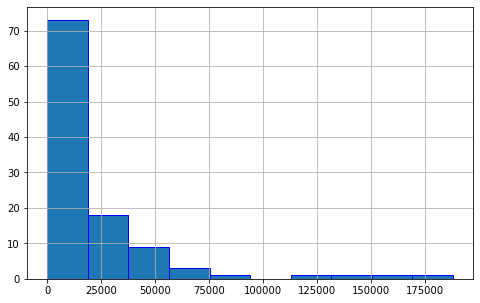

In [26]:
nc["confirmed_daily_normalized"].hist(bins=10, ec='blue', figsize=(8,5))

**Description:**
* From the histogram, it can be seen that North Carolina have very high number of cases initially which starts decreasing eventually and becomes very low in the end.
* It is a positive skew type distribution because it has skew to the right side.
* It is unimodal distribution
* It is exponential distribution as the random variable is taking values after performing normalization.

In [27]:
#Distribution for AL

<AxesSubplot:>

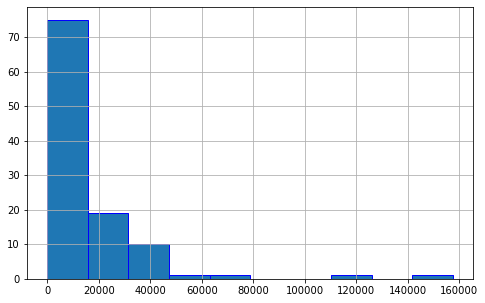

In [28]:
al["confirmed_daily_normalized"].hist(bins=10, ec='blue', figsize=(8,5))

**Description:**
* From the histogram, it can be seen that Alabama have very high number of cases initially which starts decreasing eventually,  becomes zero and then start increasing again.
* It is a positive skew type distribution because it has skew to the right side.
* It is unimodal distribution
* It is exponential distribution as the random variable is taking values after performing normalization.

In [29]:
#Distribution for CA

<AxesSubplot:>

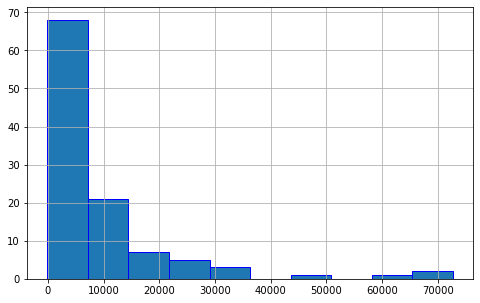

In [30]:
ca["confirmed_daily_normalized"].hist(bins=10, ec='blue', figsize=(8,5))

**Description:**
* From the histogram, it can be seen that California have very high number of cases initially which starts decreasing eventually, becomes zero and then start increasing again.
* It is a positive skew type distribution because it has skew to the right side.
* It is unimodal distribution
* It is exponential distribution as the random variable is taking values after performing normalization.

In [31]:
#Distribution for FL

<AxesSubplot:>

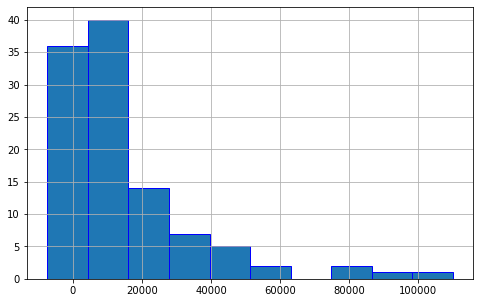

In [32]:
fl["confirmed_daily_normalized"].hist(bins=10, ec='blue', figsize=(8,5))

**Description:**
* From the histogram, it can be seen that Florida have very high number of cases initially which starts decreasing eventually, becomes zero and then start increasing again.
* It is a positive skew type distribution because it has skew to the right side.
* It is unimodal distribution
* It is exponential distribution as the random variable is taking values after performing normalization.

In [33]:
#Distribution for IL

<AxesSubplot:>

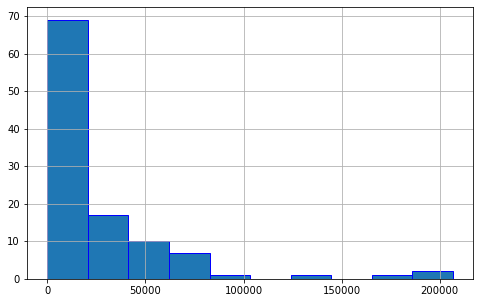

In [34]:
il["confirmed_daily_normalized"].hist(bins=10, ec='blue', figsize=(8,5))

**Description:**
* From the histogram, it can be seen that Illinois have very high number of cases initially which starts decreasing eventually, becomes zero and then start increasing again.
* It is a positive skew type distribution because it has skew to the right side.
* It is unimodal distribution
* It is exponential distribution as the random variable is taking values after performing normalization.

In [35]:
#Distribution for LA

<AxesSubplot:>

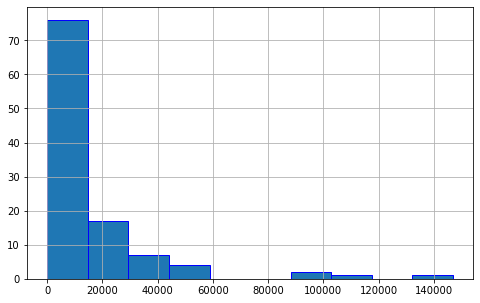

In [36]:
la["confirmed_daily_normalized"].hist(bins=10, ec='blue', figsize=(8,5))

**Description:**
* From the histogram, it can be seen that Louisiana have very high number of cases initially which starts decreasing eventually, becomes zero and then start increasing again.
* It is a positive skew type distribution because it has skew to the right side.
* It is unimodal distribution
* It is exponential distribution as the random variable is taking values after performing normalization.

In [37]:
#mean calculation

In [38]:
#cases

In [39]:
nc_mean  = nc["confirmed_daily_normalized"].mean()
round(nc_mean)

21773

In [40]:
al_mean  = al["confirmed_daily_normalized"].mean()
round(al_mean)

15476

In [41]:
ca_mean  = ca["confirmed_daily_normalized"].mean()
round(ca_mean)

9209

In [42]:
fl_mean  = fl["confirmed_daily_normalized"].mean()
round(fl_mean)

15153

In [43]:
il_mean  = il["confirmed_daily_normalized"].mean()
round(il_mean)

26015

In [44]:
la_mean  = la["confirmed_daily_normalized"].mean()
round(la_mean)

15303

In [45]:
#deaths

In [46]:
nc_mean_deaths  = nc['deaths_daily_normalized'].mean()
round(nc_mean_deaths)

234

In [47]:
al_mean_deaths  = al['deaths_daily_normalized'].mean()
round(al_mean_deaths)

260

In [48]:
ca_mean_deaths  = ca['deaths_daily_normalized'].mean()
round(ca_mean_deaths)

84

In [49]:
fl_mean_deaths  = fl['deaths_daily_normalized'].mean()
round(fl_mean_deaths)

122

In [50]:
il_mean_deaths  = il['deaths_daily_normalized'].mean()
round(il_mean_deaths)

330

In [51]:
la_mean_deaths  = la['deaths_daily_normalized'].mean()
round(la_mean_deaths)

234

In [52]:
#variance calculation

In [53]:
nc_var  = nc["confirmed_daily_normalized"].var()
nc_var

982267196.1566926

In [54]:
al_var  = al["confirmed_daily_normalized"].var()
al_var

475530219.7905452

In [55]:
ca_var  = ca["confirmed_daily_normalized"].var()
ca_var

179599711.20938087

In [56]:
fl_var  = fl["confirmed_daily_normalized"].var()
fl_var

415175947.68177265

In [57]:
il_var  = il["confirmed_daily_normalized"].var()
il_var

1380148472.299737

In [58]:
la_var  = la["confirmed_daily_normalized"].var()
la_var

505261145.90029436

In [59]:
#skewness calculation

In [60]:
nc_skew  = nc["confirmed_daily_normalized"].skew()
nc_skew

3.319234715061097

In [61]:
al_skew  = al["confirmed_daily_normalized"].skew()
al_skew

3.9983361783762095

In [62]:
ca_skew  = ca["confirmed_daily_normalized"].skew()
ca_skew

3.120498009716973

In [63]:
fl_skew  = fl["confirmed_daily_normalized"].skew()
fl_skew

2.421748461234236

In [64]:
il_skew  = il["confirmed_daily_normalized"].skew()
il_skew

3.0350599046728486

In [65]:
la_skew  = la["confirmed_daily_normalized"].skew()
la_skew

3.428304090029175

In [66]:
#kutosis caculation

In [67]:
nc_kurt  = nc["confirmed_daily_normalized"].kurtosis()
nc_kurt

12.68782960871529

In [68]:
al_kurt  = al["confirmed_daily_normalized"].kurtosis()
al_kurt

20.948549511750667

In [69]:
ca_kurt  = ca["confirmed_daily_normalized"].kurtosis()
ca_kurt

11.161163900685484

In [70]:
fl_kurt  = fl["confirmed_daily_normalized"].kurtosis()
fl_kurt

6.7486887316609465

In [71]:
il_kurt  = il["confirmed_daily_normalized"].kurtosis()
il_kurt

11.058040490419375

In [72]:
la_kurt  = la["confirmed_daily_normalized"].kurtosis()
la_kurt

14.364807769618462

#### North Carolina: 
* **Mean:** 21773
* **Variance:** 982267196.1566926
* **Skewness:** 3.319234715061097
* **Kurtosis:** 12.68782960871529

#### Alabama: 
* **Mean:** 15476
* **Variance:** 475530219.7905452
* **Skewness:** 3.9983361783762095
* **Kurtosis:** 20.948549511750667

#### California: 
* **Mean:** 9209
* **Variance:** 179599711.20938087
* **Skewness:** 3.120498009716973
* **Kurtosis:** 11.161163900685484

#### Florida: 
* **Mean:** 15153
* **Variance:** 415175947.68177265
* **Skewness:** 2.421748461234236
* **Kurtosis:** 6.7486887316609465

#### Illinois: 
* **Mean:** 26015
* **Variance:** 1380148472.299737
* **Skewness:** 3.0350599046728486
* **Kurtosis:** 11.058040490419375

#### Louisiana: 
* **Mean:** 15303
* **Variance:** 505261145.90029436
* **Skewness:** 3.428304090029175
* **Kurtosis:** 14.364807769618462

### Task 2: 
* Model a poission distribution of COVID-19 cases and deaths of a state and compare to other 5 states. For example, number of new cases and deaths per 100,000 population. Hint - the parameter for a poission's distribution will be its mean value. Then for the minimum and maximum range of covid cases you are calculating probability mass function to observe the probability at different points.

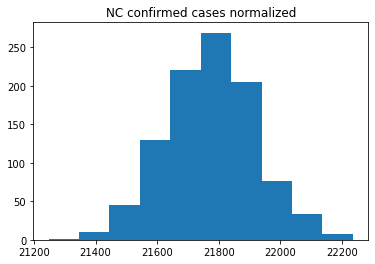

In [73]:
nc = stats.poisson.rvs(size = 1000, mu = 21773)
plt.hist(nc)
plt.title("NC confirmed cases normalized") 
plt.show()

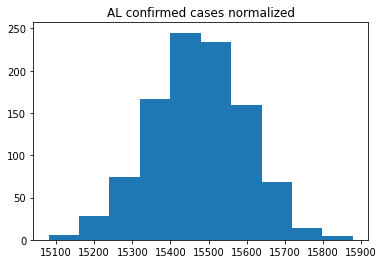

In [74]:
al = stats.poisson.rvs(size = 1000, mu = 15476)
plt.hist(al)
plt.title("AL confirmed cases normalized") 
plt.show()

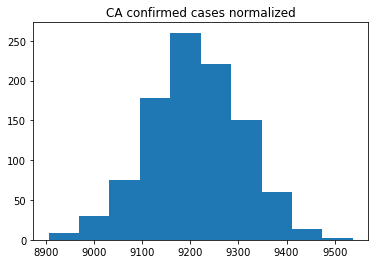

In [75]:
ca = stats.poisson.rvs(size = 1000, mu = 9209)
plt.hist(ca)
plt.title("CA confirmed cases normalized") 
plt.show()

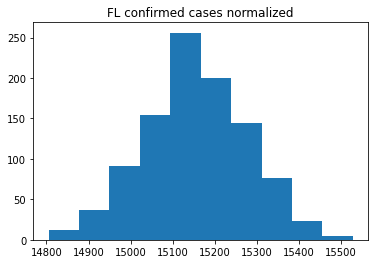

In [76]:
fl = stats.poisson.rvs(size = 1000, mu = 15153)
plt.hist(fl)
plt.title("FL confirmed cases normalized") 
plt.show()

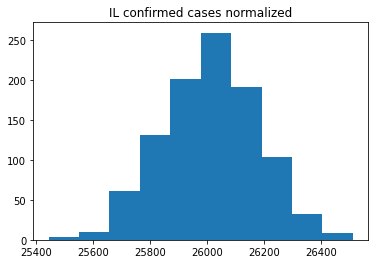

In [77]:
il = stats.poisson.rvs(size = 1000, mu = 26015)
plt.hist(il)
plt.title("IL confirmed cases normalized") 
plt.show()

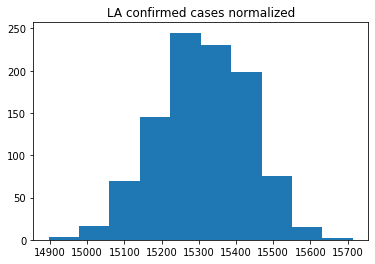

In [78]:
la = stats.poisson.rvs(size = 1000, mu = 15303)
plt.hist(la)
plt.title("LA confirmed cases normalized") 
plt.show()

In [79]:
# Poission's distribution of Deaths weekly

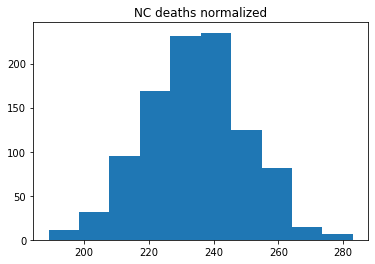

In [80]:
nc = stats.poisson.rvs(size = 1000, mu = 234)
plt.hist(nc)
plt.title("NC deaths normalized") 
plt.show()

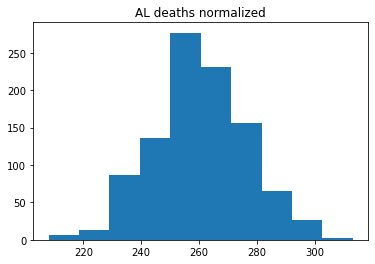

In [81]:
al = stats.poisson.rvs(size = 1000, mu = 260)
plt.hist(al)
plt.title("AL deaths normalized") 
plt.show()

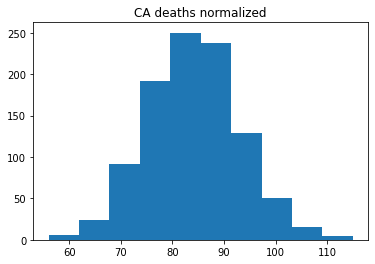

In [82]:
ca = stats.poisson.rvs(size = 1000, mu = 84)
plt.hist(ca)
plt.title("CA deaths normalized") 
plt.show()

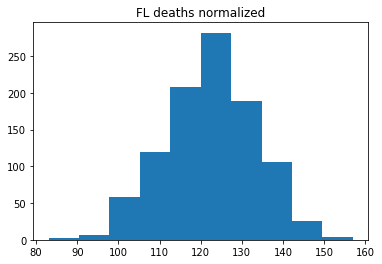

In [83]:
fl = stats.poisson.rvs(size = 1000, mu = 122)
plt.hist(fl)
plt.title("FL deaths normalized") 
plt.show()

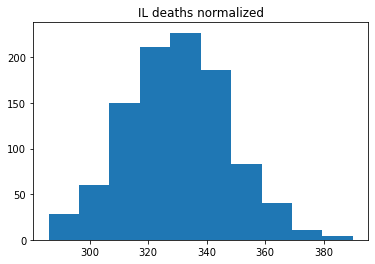

In [84]:
il = stats.poisson.rvs(size = 1000, mu = 330)
plt.hist(il)
plt.title("IL deaths normalized") 
plt.show()

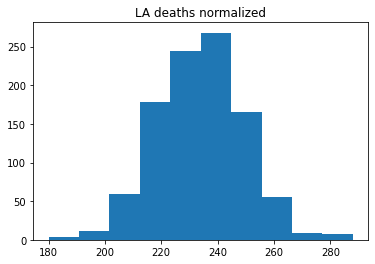

In [85]:
la = stats.poisson.rvs(size = 1000, mu = 234)
plt.hist(la)
plt.title("LA deaths normalized") 
plt.show()

# Task 3:
* Perform corelation between Enrichment data valiables and COVID-19 cases to observe any patterns.

* My enrichment dataset is **ACS demographic dataset.** It contains census information about population, population divided by age, sex, age range, race in a countywise fashion.  

In [86]:
#demographic_dataset = pd.read_csv("census_merged.csv")
demographic_dataset = pd.read_csv("../../../../data/stage_3/census_merged.csv")
demographic_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Total_pop,Male_total_population,Female_total_population,...,Population 15 to 19 Years old,Population 20 to 24 years old,Population 25 to 34 years old,Population 35 to 44 years old,Population 45 to 54 years old,Population 55 to 59 years old,Population 60 to 64 years old,Population 65 to 74 years old,Population 75 to 84 years old,Population 85 years and older
0,1003,baldwin county,AL,2020-01-22,0,0,223234,218022,105437,112585,...,13489,10426,23498,25990,30117,16569,15074,27152,13464,3827
1,1003,baldwin county,AL,2020-01-23,0,0,223234,218022,105437,112585,...,13489,10426,23498,25990,30117,16569,15074,27152,13464,3827
2,1003,baldwin county,AL,2020-01-24,0,0,223234,218022,105437,112585,...,13489,10426,23498,25990,30117,16569,15074,27152,13464,3827
3,1003,baldwin county,AL,2020-01-25,0,0,223234,218022,105437,112585,...,13489,10426,23498,25990,30117,16569,15074,27152,13464,3827
4,1003,baldwin county,AL,2020-01-26,0,0,223234,218022,105437,112585,...,13489,10426,23498,25990,30117,16569,15074,27152,13464,3827


In [87]:
nc_demo = demographic_dataset[demographic_dataset['State'] == 'NC']
nc_demo.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Total_pop,Male_total_population,Female_total_population,...,Population 15 to 19 Years old,Population 20 to 24 years old,Population 25 to 34 years old,Population 35 to 44 years old,Population 45 to 54 years old,Population 55 to 59 years old,Population 60 to 64 years old,Population 65 to 74 years old,Population 75 to 84 years old,Population 85 years and older
356048,37001,alamance county,NC,2020-01-22,0,0,169509,166436,78955,87481,...,13908,10860,19797,19543,21867,11259,10541,16087,8933,3361
356049,37001,alamance county,NC,2020-01-23,0,0,169509,166436,78955,87481,...,13908,10860,19797,19543,21867,11259,10541,16087,8933,3361
356050,37001,alamance county,NC,2020-01-24,0,0,169509,166436,78955,87481,...,13908,10860,19797,19543,21867,11259,10541,16087,8933,3361
356051,37001,alamance county,NC,2020-01-25,0,0,169509,166436,78955,87481,...,13908,10860,19797,19543,21867,11259,10541,16087,8933,3361
356052,37001,alamance county,NC,2020-01-26,0,0,169509,166436,78955,87481,...,13908,10860,19797,19543,21867,11259,10541,16087,8933,3361


In [88]:
demographic_dataset['confirmed_daily'] = demographic_dataset['Confirmed'].diff()
demographic_dataset['deaths_daily'] = demographic_dataset['Deaths'].diff()

In [89]:
demographic_dataset['confirmed_daily_normalized']= round((demographic_dataset['confirmed_daily']/demographic_dataset['population'])*100000)
demographic_dataset['deaths_daily_normalized']= round((demographic_dataset['deaths_daily']/demographic_dataset['population'])*100000)

In [90]:
x = demographic_dataset[(demographic_dataset['Date'] == '2020-01-22')].index
demographic_dataset.drop(x, inplace=True)

In [91]:
demographic_dataset['Date'] = demographic_dataset.Date.apply(lambda d: datetime.strptime(d, '%Y-%m-%d'))

In [92]:
demographic_dataset = demographic_dataset[demographic_dataset.countyFIPS != 0]
demographic_dataset.head()

,countyFIPS,County_Name,State,Date,Confirmed,Deaths,population,Total_pop,Male_total_population,Female_total_population,...,Population 45 to 54 years old,Population 55 to 59 years old,Population 60 to 64 years old,Population 65 to 74 years old,Population 75 to 84 years old,Population 85 years and older,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized
1,1003,baldwin county,AL,2020-01-23,0,0,223234,218022,105437,112585,...,30117,16569,15074,27152,13464,3827,0.0,0.0,0.0,0.0
2,1003,baldwin county,AL,2020-01-24,0,0,223234,218022,105437,112585,...,30117,16569,15074,27152,13464,3827,0.0,0.0,0.0,0.0
3,1003,baldwin county,AL,2020-01-25,0,0,223234,218022,105437,112585,...,30117,16569,15074,27152,13464,3827,0.0,0.0,0.0,0.0
4,1003,baldwin county,AL,2020-01-26,0,0,223234,218022,105437,112585,...,30117,16569,15074,27152,13464,3827,0.0,0.0,0.0,0.0
5,1003,baldwin county,AL,2020-01-27,0,0,223234,218022,105437,112585,...,30117,16569,15074,27152,13464,3827,0.0,0.0,0.0,0.0


## *County based encrichment and covid data correlation*


In [93]:
set1 = demographic_dataset[['confirmed_daily','Total_pop','Male_total_population','Female_total_population','Population 25 to 34 years old','Population 45 to 54 years old']]

In [94]:
set1.corr()

,confirmed_daily,Total_pop,Male_total_population,Female_total_population,Population 25 to 34 years old,Population 45 to 54 years old
confirmed_daily,1.000000,0.280175,0.279979,0.280291,0.277584,0.279976
Total_pop,0.280175,1.000000,0.999861,0.999870,0.993191,0.997378
Male_total_population,0.279979,0.999861,1.000000,0.999463,0.993006,0.997248
Female_total_population,0.280291,0.999870,0.999463,1.000000,0.993108,0.997241
Population 25 to 34 years old,0.277584,0.993191,0.993006,0.993108,1.000000,0.987229
Population 45 to 54 years old,0.279976,0.997378,0.997248,0.997241,0.987229,1.000000


## *State based enrichment and covid data correlation*
### *North Carolina State*

In [95]:
super_nc_dataset = demographic_dataset[demographic_dataset['State'] == 'NC']
super_nc_dataset=super_nc_dataset.drop(['countyFIPS','County_Name'],axis=1)
super_nc_dataset.head()

,State,Date,Confirmed,Deaths,population,Total_pop,Male_total_population,Female_total_population,Population under 5 years of age,Population 5 to 9 years old,...,Population 45 to 54 years old,Population 55 to 59 years old,Population 60 to 64 years old,Population 65 to 74 years old,Population 75 to 84 years old,Population 85 years and older,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized
356049,NC,2020-01-23,0,0,169509,166436,78955,87481,9419,10702,...,21867,11259,10541,16087,8933,3361,0.0,0.0,0.0,0.0
356050,NC,2020-01-24,0,0,169509,166436,78955,87481,9419,10702,...,21867,11259,10541,16087,8933,3361,0.0,0.0,0.0,0.0
356051,NC,2020-01-25,0,0,169509,166436,78955,87481,9419,10702,...,21867,11259,10541,16087,8933,3361,0.0,0.0,0.0,0.0
356052,NC,2020-01-26,0,0,169509,166436,78955,87481,9419,10702,...,21867,11259,10541,16087,8933,3361,0.0,0.0,0.0,0.0
356053,NC,2020-01-27,0,0,169509,166436,78955,87481,9419,10702,...,21867,11259,10541,16087,8933,3361,0.0,0.0,0.0,0.0


In [96]:
super_nc_dataset = super_nc_dataset[['confirmed_daily','Total_pop','Male_total_population','Female_total_population','Population 35 to 44 years old','Population 45 to 54 years old','Population 55 to 59 years old']]

### **Correlation** 

In [97]:
super_nc_dataset.corr()

,confirmed_daily,Total_pop,Male_total_population,Female_total_population,Population 35 to 44 years old,Population 45 to 54 years old,Population 55 to 59 years old
confirmed_daily,1.000000,0.243831,0.243983,0.243547,0.244108,0.243578,0.242424
Total_pop,0.243831,1.000000,0.999675,0.999717,0.996406,0.994961,0.993920
Male_total_population,0.243983,0.999675,1.000000,0.998785,0.996285,0.994124,0.992936
Female_total_population,0.243547,0.999717,0.998785,1.000000,0.995935,0.995159,0.994254
Population 35 to 44 years old,0.244108,0.996406,0.996285,0.995935,1.000000,0.996272,0.991303
Population 45 to 54 years old,0.243578,0.994961,0.994124,0.995159,0.996272,1.000000,0.996244
Population 55 to 59 years old,0.242424,0.993920,0.992936,0.994254,0.991303,0.996244,1.000000


### *Florida State*

In [98]:
super_fl_dataset = demographic_dataset[demographic_dataset['State'] == 'FL']
super_fl_dataset=super_fl_dataset.drop(['countyFIPS','County_Name'],axis=1)
super_fl_dataset.head()

,State,Date,Confirmed,Deaths,population,Total_pop,Male_total_population,Female_total_population,Population under 5 years of age,Population 5 to 9 years old,...,Population 45 to 54 years old,Population 55 to 59 years old,Population 60 to 64 years old,Population 65 to 74 years old,Population 75 to 84 years old,Population 85 years and older,confirmed_daily,deaths_daily,confirmed_daily_normalized,deaths_daily_normalized
77793,FL,2020-01-23,0,0,269043,269956,131429,138527,13669,15311,...,24784,15551,13767,22670,10292,4765,0.0,0.0,0.0,0.0
77794,FL,2020-01-24,0,0,269043,269956,131429,138527,13669,15311,...,24784,15551,13767,22670,10292,4765,0.0,0.0,0.0,0.0
77795,FL,2020-01-25,0,0,269043,269956,131429,138527,13669,15311,...,24784,15551,13767,22670,10292,4765,0.0,0.0,0.0,0.0
77796,FL,2020-01-26,0,0,269043,269956,131429,138527,13669,15311,...,24784,15551,13767,22670,10292,4765,0.0,0.0,0.0,0.0
77797,FL,2020-01-27,0,0,269043,269956,131429,138527,13669,15311,...,24784,15551,13767,22670,10292,4765,0.0,0.0,0.0,0.0


In [99]:
super_fl_dataset = super_fl_dataset[['confirmed_daily','Total_pop','Male_total_population','Female_total_population','Population 35 to 44 years old','Population 45 to 54 years old','Population 55 to 59 years old']]

### **Correlation** 

In [100]:
super_fl_dataset.corr()

,confirmed_daily,Total_pop,Male_total_population,Female_total_population,Population 35 to 44 years old,Population 45 to 54 years old,Population 55 to 59 years old
confirmed_daily,1.000000,0.173217,0.173184,0.173236,0.174698,0.175518,0.171845
Total_pop,0.173217,1.000000,0.999957,0.999962,0.993884,0.996861,0.994796
Male_total_population,0.173184,0.999957,1.000000,0.999837,0.994298,0.996804,0.994293
Female_total_population,0.173236,0.999962,0.999837,1.000000,0.993414,0.996835,0.995192
Population 35 to 44 years old,0.174698,0.993884,0.994298,0.993414,1.000000,0.996032,0.981871
Population 45 to 54 years old,0.175518,0.996861,0.996804,0.996835,0.996032,1.000000,0.992447
Population 55 to 59 years old,0.171845,0.994796,0.994293,0.995192,0.981871,0.992447,1.000000


**Observation:**
* From above correlations it can be observed that there exists a positive correlations between non normalized cases with the demographic data.
* Positive correlations implies that there is a linear relationship among the variables. As one value increase, the other value also increases

### Normalized Data correlation

In [101]:
#North carolina normalized

In [102]:
super_nc_dataset = demographic_dataset[demographic_dataset['State'] == 'NC']
super_nc_dataset=super_nc_dataset.drop(['countyFIPS','County_Name'],axis=1)
super_nc_dataset = super_nc_dataset[['confirmed_daily_normalized','Total_pop','Male_total_population','Female_total_population','Population 35 to 44 years old','Population 45 to 54 years old','Population 55 to 59 years old']]

In [103]:
super_nc_dataset.corr()

,confirmed_daily_normalized,Total_pop,Male_total_population,Female_total_population,Population 35 to 44 years old,Population 45 to 54 years old,Population 55 to 59 years old
confirmed_daily_normalized,1.000000,-0.003092,-0.002838,-0.003327,-0.001779,-0.002078,-0.003094
Total_pop,-0.003092,1.000000,0.999675,0.999717,0.996406,0.994961,0.993920
Male_total_population,-0.002838,0.999675,1.000000,0.998785,0.996285,0.994124,0.992936
Female_total_population,-0.003327,0.999717,0.998785,1.000000,0.995935,0.995159,0.994254
Population 35 to 44 years old,-0.001779,0.996406,0.996285,0.995935,1.000000,0.996272,0.991303
Population 45 to 54 years old,-0.002078,0.994961,0.994124,0.995159,0.996272,1.000000,0.996244
Population 55 to 59 years old,-0.003094,0.993920,0.992936,0.994254,0.991303,0.996244,1.000000


In [104]:
#Florida normalized

In [105]:
super_fl_dataset = demographic_dataset[demographic_dataset['State'] == 'AL']
super_fl_dataset=super_fl_dataset.drop(['countyFIPS','County_Name'],axis=1)
super_fl_dataset = super_fl_dataset[['confirmed_daily_normalized','Total_pop','Male_total_population','Female_total_population','Population 35 to 44 years old','Population 45 to 54 years old','Population 55 to 59 years old']]

In [106]:
super_fl_dataset.corr()

,confirmed_daily_normalized,Total_pop,Male_total_population,Female_total_population,Population 35 to 44 years old,Population 45 to 54 years old,Population 55 to 59 years old
confirmed_daily_normalized,1.000000,-0.003759,-0.003918,-0.003615,-0.003431,-0.003862,-0.004390
Total_pop,-0.003759,1.000000,0.999800,0.999839,0.997195,0.996866,0.983308
Male_total_population,-0.003918,0.999800,1.000000,0.999281,0.997274,0.997629,0.985068
Female_total_population,-0.003615,0.999839,0.999281,1.000000,0.996785,0.995842,0.981392
Population 35 to 44 years old,-0.003431,0.997195,0.997274,0.996785,1.000000,0.996720,0.978378
Population 45 to 54 years old,-0.003862,0.996866,0.997629,0.995842,0.996720,1.000000,0.988993
Population 55 to 59 years old,-0.004390,0.983308,0.985068,0.981392,0.978378,0.988993,1.000000


**Observation:**
* After normalizing the data for a population of 100000, it is observed there exists a negative correlation between confirmed cases normalized with the total population, Male_total_population, Female_total_population, Population 35 to 44 years old, Population 45 to 54 years old, Population 55 to 59 years old.
* This imply that when normalized cases increases, the other factors decreases. There exists an inverse relationship among them.

### Task 4
* Formulate hypothesis between Enrichment data and number of cases to be compared against states. Choose 3 different variables to compare against.
 For example: Does higher employment data lead to higher covid case numbers or more rapid increase in covid cases.

**Hypothesis:**
* States with higher **Total Population** will lead to higher number of covid cases and increase in number of covid cases.

* This implies that states with higher **Male Population** will lead to higher number of covid cases and increase in number of covid cases.

* It also implies that states with higher **Female Population** will lead to higher number of covid cases and increase in number of covid cases.

* States with higher **Middle aged Population** will lead to higher number of covid cases and increase in number of covid cases.